In [1]:
import matplotlib.pyplot as plt
from dcFBA.DynamicModels import DynamicParallelFBA

from ecoli_models import (
    get_leucine_knock_out_model,
    get_lysine_knock_out_model,
)

pyparsing import

INFO: No xlwt module available, Excel spreadsheet creation disabled
CBGLPK based on swiglpk: not all methods implimented yet! 5.0

*****
Using CPLEX
*****

doFBAMinSum not available with GLPK

INFO: No xlrd module available, Excel spreadsheet reading disabled


***********************************************************************
* Welcome to CBMPy (0.8.4) - PySCeS Constraint Based Modelling        *
*                http://cbmpy.sourceforge.net                         *
* Copyright(C) Brett G. Olivier 2014 - 2020                           *
* Systems Biology Lab, Vrije Universiteit Amsterdam                   *
* Amsterdam, The Netherlands                                          *
* CBMPy is developed as part of the BeBasic MetaToolKit Project       *
* Distributed under the GNU GPL v 3.0 licence, see                    *
* LICENCE (supplied with this release) for details                    *
***********************************************************************


In [2]:
leucine_knock_out = get_leucine_knock_out_model()
lysine_knock_out = get_lysine_knock_out_model()

getState1
Model clone time: 2.138756036758423
getState1
Model clone time: 2.0591022968292236


djFBA totally unconstrained results in nothing. If we set the minimal constraint of no uptake of lysine by dleu and no uptake of leucine in dlys than we get some results

In [3]:
#Set creation of the metabolites to zero
leucine_knock_out.getReaction("R_IPPS").setUpperBound(0)
lysine_knock_out.getReaction("R_DAPDC").setUpperBound(0)


leucine_knock_out.getReaction("R_LYStex").setLowerBound(-1000)
# Only way we can make sure the leucine knockout does not take up lysine
leucine_knock_out.getReaction("R_LYStex").setUpperBound(1000)


lysine_knock_out.getReaction("R_LEUtex").setLowerBound(-1000)
# Only way we can make sure the lysine knockout does not take up leucine
lysine_knock_out.getReaction("R_LEUtex").setUpperBound(1000)


#Restrict the release of glucose
leucine_knock_out.getReaction("R_GLCtex_copy1").setUpperBound(10)
leucine_knock_out.getReaction("R_GLCtex_copy2").setUpperBound(0)
lysine_knock_out.getReaction("R_GLCtex_copy1").setUpperBound(10)
lysine_knock_out.getReaction("R_GLCtex_copy2").setUpperBound(0)


#R_FE3tex settings from paper
leucine_knock_out.getReaction("R_FE3tex").setUpperBound(0)
lysine_knock_out.getReaction("R_FE3tex").setUpperBound(0)

leucine_knock_out.getReaction("R_O2tex").setLowerBound(-15)
lysine_knock_out.getReaction("R_O2tex").setLowerBound(-15)

leucine_knock_out.getReaction("R_EX_o2_e").setLowerBound(-30) #could also be set to 2* 18.5

lysine_knock_out.getReaction("R_EX_o2_e").setLowerBound(-30) #could also be set to 2* 18.5



In [4]:
leucine_knock_out.setId("dleu")
lysine_knock_out.setId("dlys")


In [5]:
dpFBA = DynamicParallelFBA([leucine_knock_out, lysine_knock_out], [0.0027, 0.0027],  {"M_glc__D_e": 11.96 , "M_leu__L_e": 0.0086*0.0027, "M_lys__L_e": 0.0056*0.0027},)

getState1
Model clone time: 2.3170080184936523
getState1
Model clone time: 2.3593499660491943


In [6]:
def stop (sim, used_time, run_condition):
    if sim.biomasses["dleu"][-1] + sim.biomasses["dlys"][-1] >= 0.083:
        #Stop the simulation by setting community reaction to zero, solution will be zero or nan
        sim.models["dleu"].getReaction("R_BIOMASS_Ec_iAF1260_core_59p81M").setUpperBound(0)
        sim.models["dlys"].getReaction("R_BIOMASS_Ec_iAF1260_core_59p81M").setUpperBound(0)
    return 0

In [7]:
dpFBA.simulate(0.1, epsilon=0.0001,deviate=stop)

Updating gene activity network ... done.

cplx_constructLPfromFBA time: 0.03932619094848633

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 422 rows and 759 columns.
Aggregator did 1025 substitutions.
Reduced LP has 221 rows, 598 columns, and 3076 nonzeros.
Presolve time = 0.00 sec. (3.81 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =             0.000515
Perturbation started.
Iteration:    51   Dual objective     =             0.000515
Iteration:   113   Dual objective     =             0.000515
Removing perturbation.
Iteration:   152   Dual objective     =             0.000515
Solution available (status=optimal) type: 1
Solution available (status=optimal) type: 1
Updating gene activity network ... done.

cplx_constructLPfromFBA time: 0.2332918643951416

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_Dat

CPLEX Error  1217: No solution exists.


CPLEX Error  1217: No solution exists.
No solution available (status=infeasible) type: 0
No solution available (status=infeasible) type: 0
model: dlys had an infeasible solution


In [8]:
biomasses = dpFBA.get_biomasses()
metabolites = dpFBA.get_metabolites()
time_points = dpFBA.get_time_points()


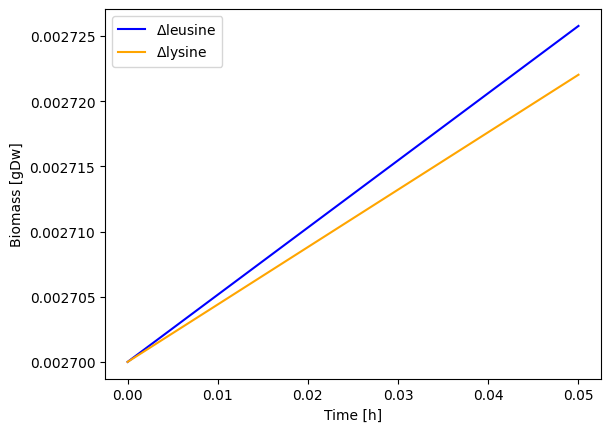

In [9]:
plt.plot(time_points, biomasses["dleu"], color="blue", label=r'$\Delta$leusine')
plt.plot(time_points, biomasses["dlys"], color="orange", label=r'$\Delta$lysine')

plt.xlabel("Time [h]")
plt.ylabel("Biomass [gDw]")
plt.legend()
plt.show()

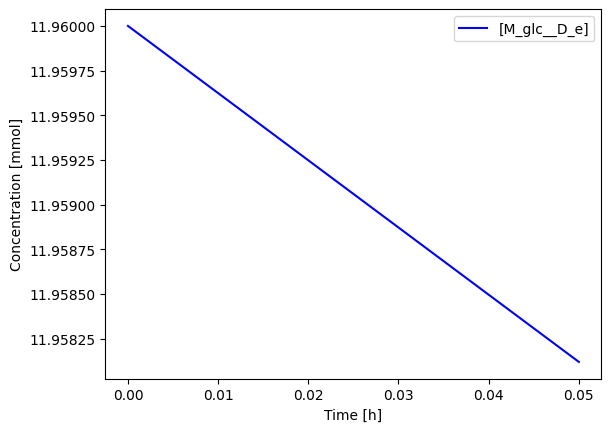

In [10]:
plt.plot(time_points, metabolites["M_glc__D_e"], color="blue", label="[M_glc__D_e]")
plt.xlabel("Time [h]")
plt.ylabel("Concentration [mmol]")
# Adding legend
plt.legend()
plt.show()

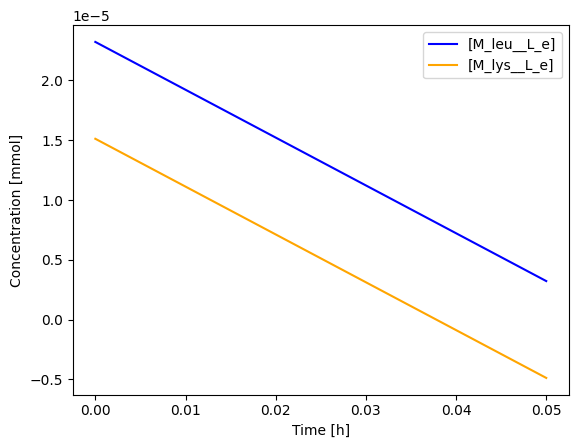

In [11]:
plt.plot(time_points, metabolites["M_leu__L_e"], color="blue", label="[M_leu__L_e]")
plt.plot(time_points, metabolites["M_lys__L_e"], color="orange", label="[M_lys__L_e]")
plt.xlabel("Time [h]")
plt.ylabel("Concentration [mmol]")
# Adding legend
plt.legend()
plt.show()

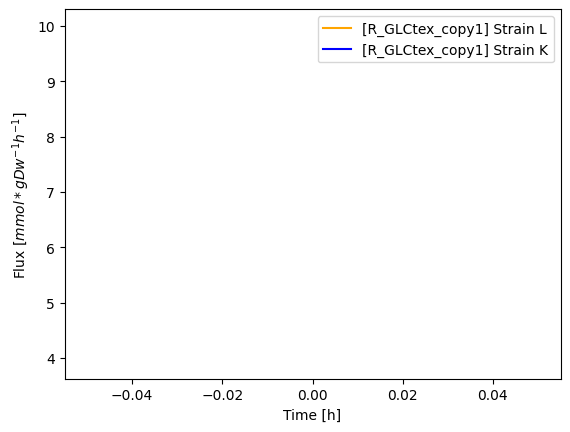

In [12]:
ls1 = dpFBA.get_specific_flux_values("dleu", "R_GLCtex_copy1")
ls2 = dpFBA.get_specific_flux_values("dlys", "R_GLCtex_copy1")

plt.plot(time_points[:-1], ls1, color="orange", label=f"[R_GLCtex_copy1] Strain L")
plt.plot(time_points[:-1], ls2, color="blue", label=f"[R_GLCtex_copy1] Strain K")

plt.legend()
plt.xlabel("Time [h]")
plt.ylabel(r'Flux [$mmol * gDw^{-1} h^{-1}$]')
plt.show()


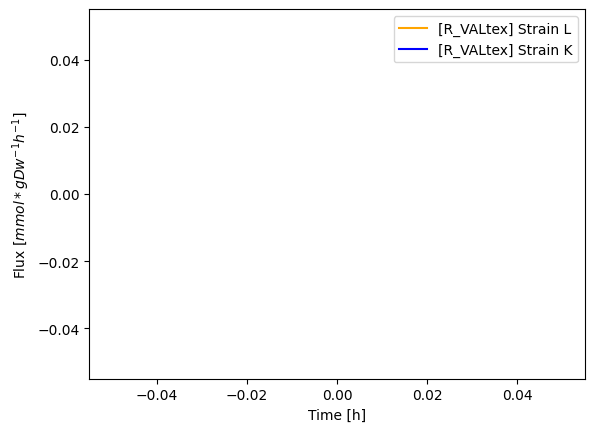

In [13]:
ls1 = dpFBA.get_specific_flux_values("dleu", "R_VALtex")
ls2 = dpFBA.get_specific_flux_values("dlys", "R_VALtex")

plt.plot(time_points[:-1], ls1, color="orange", label=f"[R_VALtex] Strain L")
plt.plot(time_points[:-1], ls2, color="blue", label=f"[R_VALtex] Strain K")

plt.legend()
plt.xlabel("Time [h]")
plt.ylabel(r'Flux [$mmol * gDw^{-1} h^{-1}$]')
plt.show()

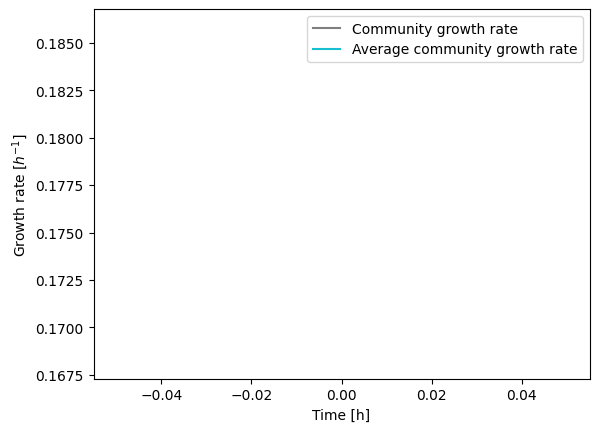

0.17703458214002055


In [14]:
biomass_flux_dleu = dpFBA.get_flux_values("dleu", "R_BIOMASS_Ec_iAF1260_core_59p81M")
biomass_flux_dlys = dpFBA.get_flux_values("dlys", "R_BIOMASS_Ec_iAF1260_core_59p81M")
xcomm = []

for i,bm in enumerate(biomass_flux_dleu):
    xcomm.append((bm + biomass_flux_dlys[i]) / (biomasses["dleu"][i] + biomasses["dlys"][i]) )


plt.plot(time_points[:-1], xcomm, color=f"C{17}", label=f"Community growth rate")
plt.plot(time_points[:-1], [sum(xcomm)/len(xcomm)] * len(xcomm), color=f"C{19}", label=f"Average community growth rate")

plt.xlabel("Time [h]")
plt.ylabel(r'Growth rate [$h^{-1}$]')
plt.legend()


plt.show()


print(sum(xcomm)/len(xcomm))

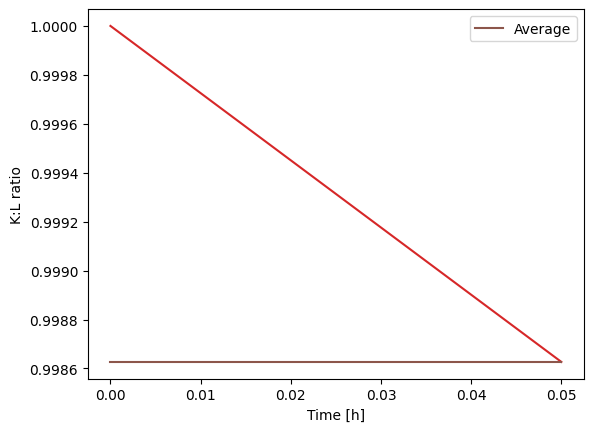

0.998626666502656


In [15]:
fls = [ v / biomasses["dleu"][t+1] for t,v in enumerate(biomasses["dlys"][1:])]
plt.plot(time_points, [1]+fls, color=f"C{3}")
plt.plot(time_points, [sum(fls)/len(fls)] *(len(time_points)), color=f"C{5}", label=f"Average")
plt.xlabel("Time [h]")
plt.ylabel("K:L ratio")
plt.legend()


plt.show()

print(fls[-1])

